Explore 2nd Set of CC-Data


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('../data/raw/call-center-performance-report/Call Center - Dataset.csv')


In [95]:
# Remove all rows with 'Sub Total' in any column and all rows with a non-null 'Location ID'
df_cleaned = df.copy()
# Remove rows where any column contains 'Sub Total'
df_cleaned = df_cleaned[~df_cleaned.apply(lambda row: row.astype(str).str.contains('Sub Total').any(), axis=1)]
df_cleaned = df_cleaned[:-1]  # Remove the last row if it is a total summary
df_cleaned.reset_index(drop=True, inplace=True)

# Ensure Date column is clean and parsed correctly
df_cleaned['Date'] = (
    df_cleaned['Date']
    .astype(str)                 # force everything to string
    .str.strip()                 # remove extra spaces
    .pipe(pd.to_datetime, errors='coerce')
)

# Create ISO week labels for better grouping
iso_calendar = df_cleaned['Date'].dt.isocalendar()
df_cleaned['Week'] = 'W' + iso_calendar['week'].astype(str).str.zfill(2) + '-' + iso_calendar['year'].astype(str)

# Convert hh:mm:ss strings to seconds
time_cols = ['ACD Time', 'ACW Time', 'Long Distance Time']

for col in time_cols:
    df_cleaned[col] = pd.to_timedelta(df_cleaned[col], errors='coerce').dt.total_seconds()



# # Optional: check if any values failed to convert
# bad_dates = df_cleaned[df_cleaned['Date'].isna()]

# if not bad_dates.empty:
#     print("⚠️ Unparseable dates found:")
#     print(bad_dates['Date'].unique())

# Reset index after filtering

# Remove rows where 'Location ID' is not null (if column exists)
# if 'Location ID' in df_cleaned.columns:
#     df_cleaned = df_cleaned[df_cleaned['Location ID'].isnull()]
# df_cleaned.reset_index(drop=True, inplace=True)
display(df_cleaned)

df_save = df_cleaned.copy()

,Date,Skill #,Login ID,Location ID,RONA Calls,Long Distance Outbounds,Long Distance Time,ACD Calls,AHT Inbound,AHT Outbound,...,Time in Aux 3,Time in Aux 4,Time in Aux 5,Time in Aux 6,Time in Aux 7,Time in Aux 8,Time in Aux 9,CB Productive Utilization,CB Inbound Utilization,Week
0,2025-01-02,556,6376719,805,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:00:00,09:55:19,00:00:00,00:00:00,00:00:00,100,100,W01-2025
1,2025-01-02,557,6376998,421,0,1,21.0,0,00:00:00,00:00:21,...,01:00:04,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,01:18:54,34,34,W01-2025
2,2025-01-02,558,6377632,807,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,100,100,W01-2025
3,2025-01-02,558,6377634,807,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:03:29,00:00:00,00:00:00,00:00:00,00:00:00,100,100,W01-2025
4,2025-01-02,558,6377639,807,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:06:22,00:00:00,00:00:00,00:00:00,00:00:00,100,100,W01-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41876,2025-07-02,852,6377538,402,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0,0,W27-2025
41877,2025-07-02,852,6377701,402,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0,0,W27-2025
41878,2025-07-02,852,6382357,402,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0,0,W27-2025
41879,2025-07-02,852,6382875,402,0,0,0.0,0,00:00:00,00:00:00,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0,0,W27-2025


In [96]:
#df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])  # Convert 'Date' column to datetime
df_cleaned['ACD Time']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
41876    0.0
41877    0.0
41878    0.0
41879    0.0
41880    0.0
Name: ACD Time, Length: 41881, dtype: float64

In [98]:
# Export df_cleaned as an Excel file
#df_cleaned.to_csv('../data/processed/call_center_cleaned.csv', index=False)

display(df_cleaned.dtypes)

Date                         datetime64[ns]
Skill #                              object
Login ID                             object
Location ID                          object
RONA Calls                            int64
Long Distance Outbounds               int64
Long Distance Time                  float64
ACD Calls                             int64
AHT Inbound                          object
AHT Outbound                         object
ACD Time                            float64
ACW Time                            float64
Hold Time                            object
Ring Time                            object
Outbound Time                        object
Other Time                           object
Avail Time                           object
Staffed Time                         object
Hold Calls                            int64
Transferred Calls                     int64
Extension In Calls                    int64
Extension In Time                    object
Extension Out Calls             

,Week,Long Distance Outbounds,ACD Calls,ACD Time,ACW Time,Long Distance Time
0,W01-2025,27,762,570496.0,109532.0,10094.0
1,W02-2025,168,2209,1679990.0,297999.0,35236.0
2,W03-2025,209,2725,2081183.0,381213.0,48753.0
3,W04-2025,187,2972,2325351.0,371184.0,50357.0
4,W05-2025,218,2877,2196132.0,359654.0,47793.0
5,W06-2025,202,2687,2023639.0,337756.0,37576.0
6,W07-2025,189,2774,1946185.0,341874.0,32034.0
7,W08-2025,199,2774,2072119.0,354898.0,53522.0
8,W09-2025,194,2595,1937980.0,328390.0,50081.0
9,W10-2025,200,2508,1815490.0,319362.0,42225.0


,Week,Long Distance Outbounds,ACD Calls,ACD Time,ACW Time,Long Distance Time,Perc_Outbound,Perc_Inbound,AHT_Inbound,AHT_Outbound
0,W01-2025,27,762,570496.0,109532.0,10094.0,3.422053,96.577947,892.425197,373.851852
1,W02-2025,168,2209,1679990.0,297999.0,35236.0,7.067732,92.932268,895.422816,209.738095
2,W03-2025,209,2725,2081183.0,381213.0,48753.0,7.123381,92.876619,903.631560,233.267943
3,W04-2025,187,2972,2325351.0,371184.0,50357.0,5.919595,94.080405,907.313257,269.288770
4,W05-2025,218,2877,2196132.0,359654.0,47793.0,7.043619,92.956381,888.351060,219.233945
5,W06-2025,202,2687,2023639.0,337756.0,37576.0,6.992039,93.007961,878.822106,186.019802
6,W07-2025,189,2774,1946185.0,341874.0,32034.0,6.378670,93.621330,824.822999,169.492063
7,W08-2025,199,2774,2072119.0,354898.0,53522.0,6.693576,93.306424,874.916006,268.954774
8,W09-2025,194,2595,1937980.0,328390.0,50081.0,6.955898,93.044102,873.360308,258.149485
9,W10-2025,200,2508,1815490.0,319362.0,42225.0,7.385524,92.614476,851.216906,211.125000


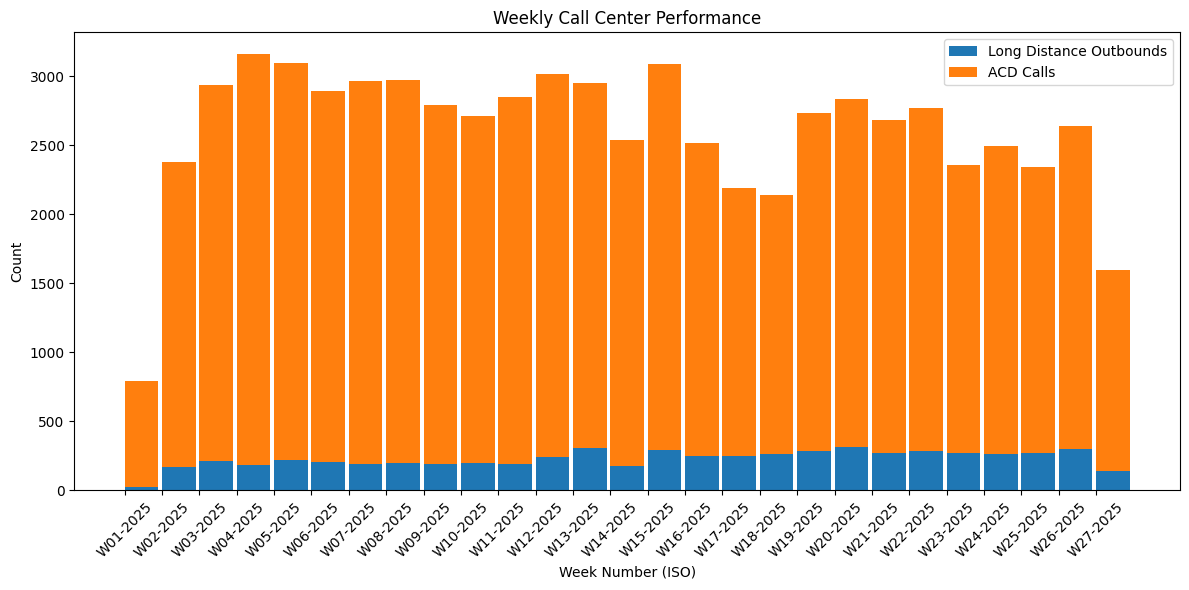

In [100]:
import matplotlib.pyplot as plt
from numpy import dsplit

# --- Step 1: Aggregate by ISO week (fast, week only in agg) ---
iso_calendar = df_cleaned['Date'].dt.isocalendar()
week_labels = iso_calendar['year'].astype(str) + '-W' + iso_calendar['week'].astype(str)

# --- Aggregate weekly ---
agg_week = (
    df_cleaned.groupby('Week', as_index=False)
    .agg({
        'Long Distance Outbounds': 'sum',
        'ACD Calls': 'sum',
        'ACD Time': 'sum',
        'ACW Time': 'sum',
        'Long Distance Time': 'sum'
    })
)
display(agg_week)


# --- Calculate percentages ---
agg_week['Perc_Outbound'] = 100 * agg_week['Long Distance Outbounds'] / (agg_week['Long Distance Outbounds'] + agg_week['ACD Calls'])
agg_week['Perc_Inbound'] = 100 * agg_week['ACD Calls'] / (agg_week['Long Distance Outbounds'] + agg_week['ACD Calls'])

# --- Calculate AHT ---
agg_week['AHT_Inbound'] = (agg_week['ACD Time'] + agg_week['ACW Time']) / agg_week['ACD Calls']
agg_week['AHT_Outbound'] = agg_week['Long Distance Time'] / agg_week['Long Distance Outbounds']

# Optional: drop raw time columns if not needed
#agg_week = agg_week.drop(columns=['ACD Time', 'ACW Time', 'Long Distance Time'])

display(agg_week)
# Optional: rename for clarity
agg_week = agg_week.rename(columns={agg_week.columns[0]: 'Week'})

# --- Step 2: Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bars without space between bars
ax.bar(agg_week['Week'], agg_week['Long Distance Outbounds'], 
       label='Long Distance Outbounds', width=0.9, align='edge')
ax.bar(agg_week['Week'], agg_week['ACD Calls'], 
       label='ACD Calls', width=0.9, align='edge', 
       bottom=agg_week['Long Distance Outbounds'])

# Beautify plot
ax.set_xlabel("Week Number (ISO)")
ax.set_ylabel("Count")
ax.set_title("Weekly Call Center Performance")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


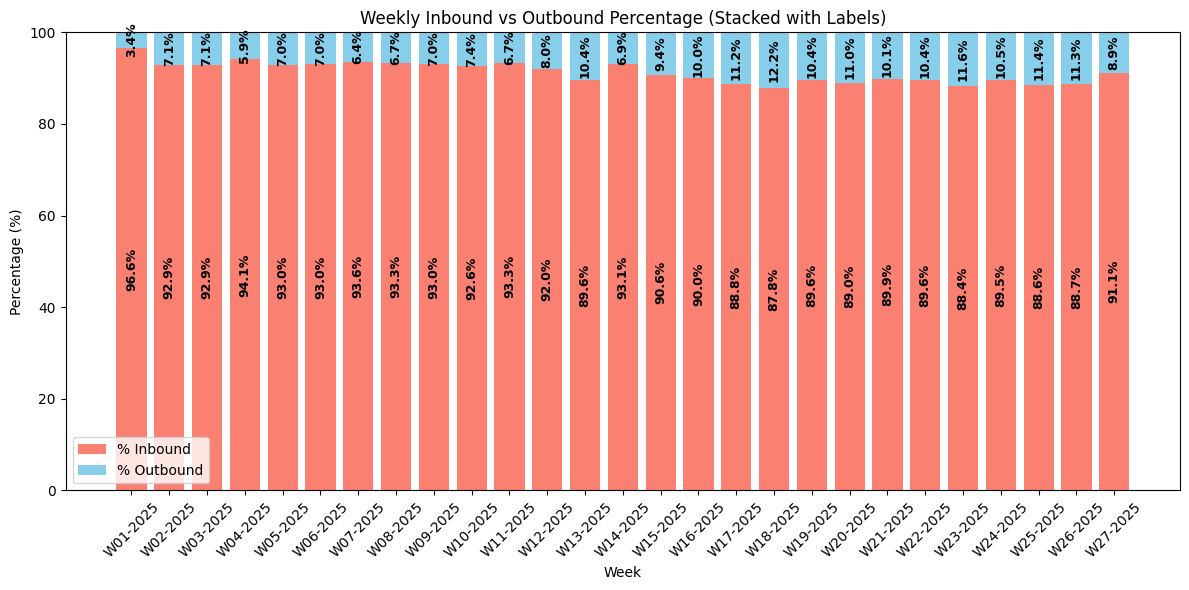

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# --- Plot stacked bars ---
bars_in = ax.bar(agg_week['Week'], agg_week['Perc_Inbound'], 
                 label='% Inbound', color='salmon', width=0.8, align='center')
bars_out = ax.bar(agg_week['Week'], agg_week['Perc_Outbound'], 
                  bottom=agg_week['Perc_Inbound'], label='% Outbound', color='skyblue', width=0.8, align='center')

# --- Annotate bars with percentage values (black, rotated 90 degrees) ---
for i, (in_val, out_val) in enumerate(zip(agg_week['Perc_Inbound'], agg_week['Perc_Outbound'])):
    # Inbound label
    ax.text(i, in_val/2, f'{in_val:.1f}%', ha='center', va='center', color='black', fontsize=9, fontweight='bold', rotation=90)
    # Outbound label
    ax.text(i, in_val + out_val/2, f'{out_val:.1f}%', ha='center', va='center', color='black', fontsize=9, fontweight='bold', rotation=90)

# --- Beautify plot ---
ax.set_xlabel("Week")
ax.set_ylabel("Percentage (%)")
ax.set_title("Weekly Inbound vs Outbound Percentage (Stacked with Labels)")
ax.legend()
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [84]:
agent_worked_hours_second = 12 * 60 * 60

In [85]:
df_cleaned['Weekday'] = df_cleaned['Date'].dt.dayofweek

# Or with names
df_cleaned['Weekday_name'] = df_cleaned['Date'].dt.day_name()

# Count how many dates exist for each weekday
weekday_counts = df_cleaned['Weekday_name'].value_counts().sort_index()
print(weekday_counts)

# Alternatively, check which weekdays are missing
all_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
missing_days = [day for day in all_weekdays if day not in df_cleaned['Weekday_name'].unique()]
print("Missing weekdays:", missing_days)

Weekday_name
Friday       8061
Monday       8206
Thursday     8188
Tuesday      8739
Wednesday    8687
Name: count, dtype: int64
Missing weekdays: ['Saturday', 'Sunday']


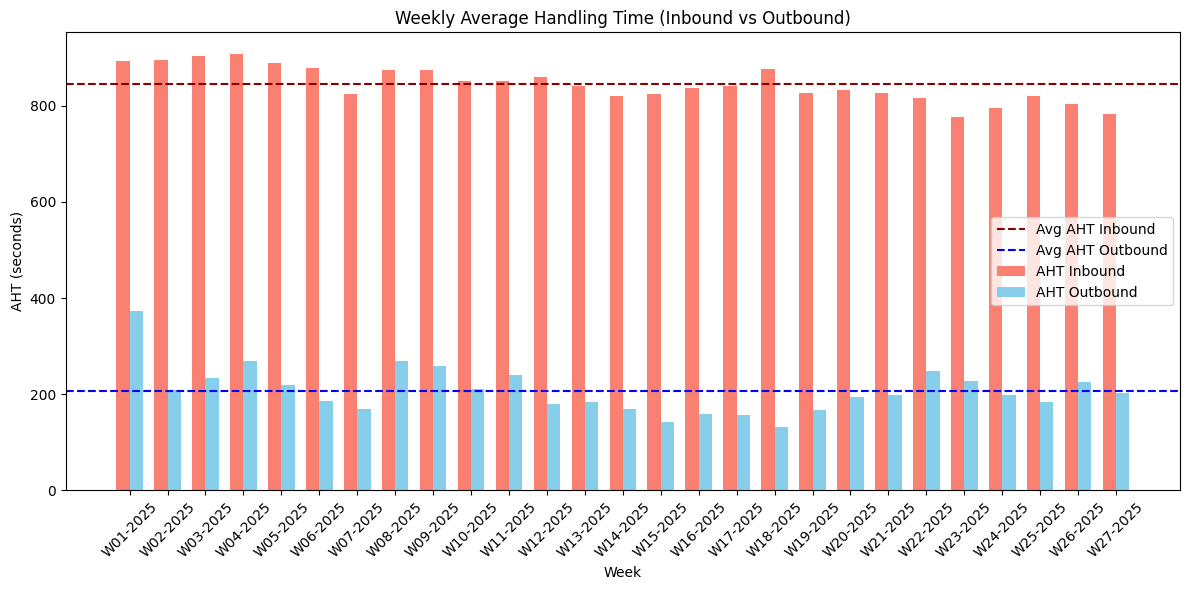

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare data ---
weeks = agg_week['Week']
aht_in = agg_week['AHT_Inbound']
aht_out = agg_week['AHT_Outbound']

x = np.arange(len(weeks))  # label locations
width = 0.35  # width of the bars

# --- Create plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# Bars: AHT inbound/outbound
ax.bar(x - width/2, aht_in, width, label='AHT Inbound', color='salmon')
ax.bar(x + width/2, aht_out, width, label='AHT Outbound', color='skyblue')

# Optional: add average lines
avg_aht_in = aht_in.mean()
avg_aht_out = aht_out.mean()
ax.axhline(avg_aht_in, color='darkred', linestyle='--', linewidth=1.5, label='Avg AHT Inbound')
ax.axhline(avg_aht_out, color='blue', linestyle='--', linewidth=1.5, label='Avg AHT Outbound')

# --- Beautify plot ---
ax.set_xlabel("Week")
ax.set_ylabel("AHT (seconds)")
ax.set_title("Weekly Average Handling Time (Inbound vs Outbound)")
ax.set_xticks(x)
ax.set_xticklabels(weeks, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [106]:
import pandas as pd
import numpy as np

# Make sure 'Date' is datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Add ISO year and week columns
df_cleaned['ISO_Year'] = df_cleaned['Date'].dt.isocalendar().year
df_cleaned['ISO_Week'] = df_cleaned['Date'].dt.isocalendar().week

# Function to count weekdays per ISO week
workdays_per_week = (
    df_cleaned
    .groupby(['ISO_Year', 'ISO_Week'])['Date']
    .nunique()  # unique dates in the week
    .reset_index(name='Workdays')
)

# Display weeks 16–17 of 2025
workdays_per_week[(workdays_per_week['ISO_Year'] == 2025) & 
                  (workdays_per_week['ISO_Week'].isin([16,17]))]



,ISO_Year,ISO_Week,Workdays
15,2025,16,5
16,2025,17,5
